In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from smoker_status.config import RAW_DATA_DIR
from smoker_status.features import setup_X
from smoker_status.util import count_missing_values, try_clustering, plot_within_cluster_sum_squares, cluster_and_classify

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

df = pd.read_csv(RAW_DATA_DIR / 'train.csv')

In [3]:
X = df.drop(['id'], axis=1)
X = setup_X(X)
X

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,smoking,sex,anemia,HDL class,LDL class,Cholesterol class,blood pressure class,GGT level,triglyceride class,creatinine class,ALT class,AST class,FPG class,BMI class,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,AST/ALT,BMI
0,0.5,0.6,1,1,1,0,1,1.0,0,1,0,0,2,1,2,0,0,0,1,1,0.902985,-0.030268,-0.567581,-0.223489,0.981702,1.125777,-0.261612,-0.837985,1.867645,-1.135246,-1.653948,1.189928,0.633762,-0.342507,0.133605,-0.131025,-0.551141,-0.716686
1,0.6,0.7,2,2,1,1,0,2.0,0,1,1,0,2,2,0,0,0,0,3,2,2.169636,-0.030268,-0.170319,0.669577,1.845852,0.681066,3.044832,-0.063252,-1.328226,0.082162,0.511737,0.980315,1.153301,0.345028,-0.034707,0.375369,0.254395,-0.171497
2,0.4,0.5,1,1,1,0,1,2.0,0,1,0,0,0,3,1,0,0,0,1,3,-2.052535,0.536694,0.624205,-0.223489,-0.353802,-0.208355,-1.543290,-0.626695,1.071711,-0.777185,-0.757390,1.818767,-0.488163,0.345028,0.570224,0.958070,-0.577848,0.444907
3,1.5,1.2,1,1,1,1,0,2.0,0,0,1,0,2,1,2,0,0,0,1,3,-0.785883,1.670617,2.213252,2.455708,0.667465,1.236955,-0.500930,-0.556264,1.128441,-1.278470,-0.371731,0.770702,0.633762,-0.660468,0.289438,0.037755,-0.977935,1.445142
4,1.5,1.0,1,1,1,0,1,-2.0,0,1,0,0,1,1,0,0,0,0,1,1,-1.208100,-0.030268,-0.567581,-0.279305,-0.118125,-0.097177,-0.500930,-1.436643,-0.469312,-0.848797,-0.757390,0.421347,-0.488163,-0.830998,-1.168096,-0.863687,0.943477,-0.716686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,1.5,2.0,1,1,1,0,0,-2.0,0,2,2,1,2,0,0,0,1,0,0,1,-0.363666,-1.164191,-1.759366,-1.563087,0.353229,0.347533,-3.091887,1.486214,-1.621161,1.156345,1.486011,-0.207493,-0.488163,0.086008,0.212965,-1.280426,-0.315690,-1.698708
159252,1.0,1.0,1,1,1,0,0,0.8,0,2,1,1,2,0,2,0,0,0,1,4,0.480768,-1.164191,0.624205,-0.111855,-0.196684,0.347533,-0.664851,0.605836,1.119102,0.583447,-0.132920,-0.207493,-1.742368,-0.497873,-0.315493,-0.774031,-0.071070,2.008127
159253,1.5,1.0,1,1,1,0,0,-2.0,2,2,0,0,0,0,0,0,0,0,1,1,-0.363666,-0.597229,-1.362104,-1.897986,-0.668039,-0.764243,-1.091145,-0.239328,-1.702038,2.230528,-0.757390,-2.722849,-1.742368,-1.610921,-1.875622,-1.403314,1.387361,-1.460997
159254,1.2,1.0,1,1,1,0,1,2.0,0,1,0,0,3,2,0,0,0,0,2,3,0.480768,-0.030268,0.624205,1.004477,-0.118125,1.459310,1.664874,-1.084492,0.531412,-0.061063,-1.385202,-0.277364,1.153301,-0.342507,-0.639638,0.375369,0.552856,0.918882


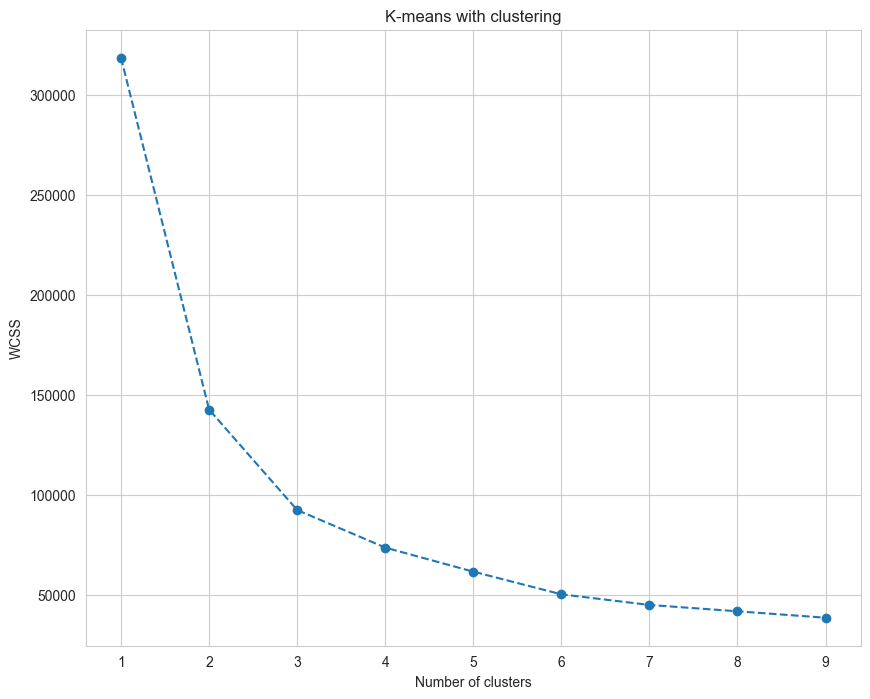

In [34]:
clustering_cols = ['relaxation', 'systolic']
# clustering_cols = ['height(cm)', 'hemoglobin']
# clustering_cols = ['height(cm)', 'weight(kg)']
plot_within_cluster_sum_squares(X, clustering_cols)

Choose `n_clusters` according to the elbow rule

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,smoking,sex,anemia,HDL class,LDL class,Cholesterol class,blood pressure class,GGT level,triglyceride class,creatinine class,ALT class,AST class,FPG class,BMI class,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,AST/ALT,BMI,Cluster
0,0.5,0.6,1,1,1,0,1,1.0,0,1,0,0,2,1,2,0,0,0,1,1,0.902985,-0.030268,-0.567581,-0.223489,0.981702,1.125777,-0.261612,-0.837985,1.867645,-1.135246,-1.653948,1.189928,0.633762,-0.342507,0.133605,-0.131025,-0.551141,-0.716686,0
1,0.6,0.7,2,2,1,1,0,2.0,0,1,1,0,2,2,0,0,0,0,3,2,2.169636,-0.030268,-0.170319,0.669577,1.845852,0.681066,3.044832,-0.063252,-1.328226,0.082162,0.511737,0.980315,1.153301,0.345028,-0.034707,0.375369,0.254395,-0.171497,0
2,0.4,0.5,1,1,1,0,1,2.0,0,1,0,0,0,3,1,0,0,0,1,3,-2.052535,0.536694,0.624205,-0.223489,-0.353802,-0.208355,-1.543290,-0.626695,1.071711,-0.777185,-0.757390,1.818767,-0.488163,0.345028,0.570224,0.958070,-0.577848,0.444907,1
3,1.5,1.2,1,1,1,1,0,2.0,0,0,1,0,2,1,2,0,0,0,1,3,-0.785883,1.670617,2.213252,2.455708,0.667465,1.236955,-0.500930,-0.556264,1.128441,-1.278470,-0.371731,0.770702,0.633762,-0.660468,0.289438,0.037755,-0.977935,1.445142,0
4,1.5,1.0,1,1,1,0,1,-2.0,0,1,0,0,1,1,0,0,0,0,1,1,-1.208100,-0.030268,-0.567581,-0.279305,-0.118125,-0.097177,-0.500930,-1.436643,-0.469312,-0.848797,-0.757390,0.421347,-0.488163,-0.830998,-1.168096,-0.863687,0.943477,-0.716686,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,1.5,2.0,1,1,1,0,0,-2.0,0,2,2,1,2,0,0,0,1,0,0,1,-0.363666,-1.164191,-1.759366,-1.563087,0.353229,0.347533,-3.091887,1.486214,-1.621161,1.156345,1.486011,-0.207493,-0.488163,0.086008,0.212965,-1.280426,-0.315690,-1.698708,2
159252,1.0,1.0,1,1,1,0,0,0.8,0,2,1,1,2,0,2,0,0,0,1,4,0.480768,-1.164191,0.624205,-0.111855,-0.196684,0.347533,-0.664851,0.605836,1.119102,0.583447,-0.132920,-0.207493,-1.742368,-0.497873,-0.315493,-0.774031,-0.071070,2.008127,2
159253,1.5,1.0,1,1,1,0,0,-2.0,2,2,0,0,0,0,0,0,0,0,1,1,-0.363666,-0.597229,-1.362104,-1.897986,-0.668039,-0.764243,-1.091145,-0.239328,-1.702038,2.230528,-0.757390,-2.722849,-1.742368,-1.610921,-1.875622,-1.403314,1.387361,-1.460997,1
159254,1.2,1.0,1,1,1,0,1,2.0,0,1,0,0,3,2,0,0,0,0,2,3,0.480768,-0.030268,0.624205,1.004477,-0.118125,1.459310,1.664874,-1.084492,0.531412,-0.061063,-1.385202,-0.277364,1.153301,-0.342507,-0.639638,0.375369,0.552856,0.918882,2


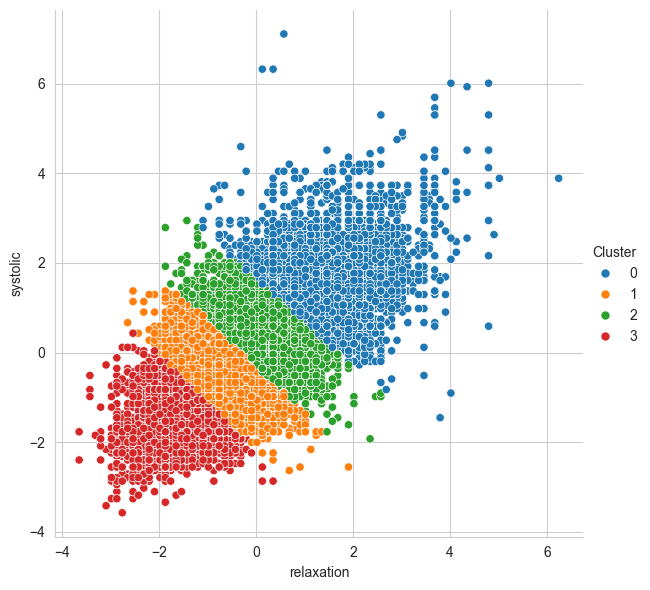

In [35]:
n_clusters = 4
try_clustering(X, clustering_cols, n_clusters, True)

In [39]:
classifiers: list[RandomForestClassifier | LogisticRegression | DecisionTreeClassifier | KNeighborsClassifier] = [
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    LogisticRegression(n_jobs=-1),
    DecisionTreeClassifier(min_samples_leaf=100, random_state=0),
    KNeighborsClassifier(n_neighbors=51, n_jobs=-1),
]

df_copy = df.copy(deep=True)
df_y = df_copy.pop('smoking')

for clf in classifiers:
    print(clf)
    # Base classifier, original data
    print('Base classifier, original data')
    cv = 5
    acc_cv: np.ndarray = cross_val_score(clf, df_copy, df_y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f'Unmodified, base accuracy score: {acc_cv.mean()}')
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(
        df_copy, df_y, test_size=test_size, random_state=0
    )
    clf.fit(X_train, y_train)
    y_predict_proba = clf.predict_proba(X_test)
    print(f'Unmodified, base ROC AUC score: {metrics.roc_auc_score(y_test, y_predict_proba[:, 1])}')
    print()

    # Base classifier
    print('Base classifier')
    X_copy = X.copy(deep=True)
    y = X_copy.pop('smoking')
    acc_cv: np.ndarray = cross_val_score(clf, X_copy, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f'Base accuracy score: {acc_cv.mean()}')
    X_train, X_test, y_train, y_test = train_test_split(
        X_copy, y, test_size=test_size, random_state=0
    )
    clf.fit(X_train, y_train)
    y_predict_proba = clf.predict_proba(X_test)
    print(f'Base ROC AUC score: {metrics.roc_auc_score(y_test, y_predict_proba[:, 1])}')
    print()

    # Clustering
    res = cluster_and_classify(X, clustering_cols, n_clusters, clf, cv=cv, test_size=test_size)
    print('Clustered accuracy scores')
    for acc in res[0]:
        print(acc)
    print(f'Average: {np.mean(res[0])}')
    print('Clustered AUC scores')
    for auc in res[3]:
        print(auc)
    print(f'Average: {np.mean(res[3])}')
    print('==============================')


RandomForestClassifier(n_jobs=-1, random_state=0)
Base classifier, original data
Unmodified, base accuracy score: 0.7745454098632442
Unmodified, base ROC AUC score: 0.8579191499898203

Base classifier
Base accuracy score: 0.775010047430876
Base ROC AUC score: 0.8566649510282982

Clustered accuracy scores
0.7589272721463229
0.7724520237186551
0.7585430556589183
0.8195634000045715
Average: 0.777371437882117
Clustered AUC scores
0.8426178355292043
0.854537350957908
0.8392118651165145
0.8869744462534134
Average: 0.8558353744642601
LogisticRegression(n_jobs=-1)
Base classifier, original data
Unmodified, base accuracy score: 0.7232129503793197
Unmodified, base ROC AUC score: 0.8035330838920954

Base classifier
Base accuracy score: 0.7588474092524081
Base ROC AUC score: 0.843685513100117

Clustered accuracy scores
0.7474412021800554
0.7620142030405951
0.7466232981870388
0.8115663612832424
Average: 0.7669112661727329
Clustered AUC scores
0.8335304039358854
0.8430685216851967
0.829078743153426


In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

X_copy = X.copy(deep=True)
y = X_copy.pop('smoking')

min_features_to_select = 1
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)
rfecv.fit(X_copy, y)

print(rfecv.n_features_)

c:\Users\tooth\Desktop\gross\smoker-status\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


29


In [26]:
rfecv.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [27]:
rfecv.ranking_

array([5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 7, 1, 1, 1, 4, 1, 1, 1,
       6, 1, 1, 1, 9, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1])

In [29]:
X_copy[rfecv.get_feature_names_out()]

,eyesight(right),hearing(right),Urine protein,dental caries,sex,anemia,HDL class,LDL class,blood pressure class,GGT level,triglyceride class,ALT class,AST class,FPG class,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,AST/ALT,BMI
0,0.6,1,1,0,1.0,0,1,0,2,1,2,0,0,1,0.902985,-0.030268,-0.567581,0.981702,1.125777,-0.261612,1.867645,-1.135246,-1.653948,1.189928,-0.342507,0.133605,-0.131025,-0.551141,-0.716686
1,0.7,2,1,1,2.0,0,1,1,2,2,0,0,0,3,2.169636,-0.030268,-0.170319,1.845852,0.681066,3.044832,-1.328226,0.082162,0.511737,0.980315,0.345028,-0.034707,0.375369,0.254395,-0.171497
2,0.5,1,1,0,2.0,0,1,0,0,3,1,0,0,1,-2.052535,0.536694,0.624205,-0.353802,-0.208355,-1.543290,1.071711,-0.777185,-0.757390,1.818767,0.345028,0.570224,0.958070,-0.577848,0.444907
3,1.2,1,1,1,2.0,0,0,1,2,1,2,0,0,1,-0.785883,1.670617,2.213252,0.667465,1.236955,-0.500930,1.128441,-1.278470,-0.371731,0.770702,-0.660468,0.289438,0.037755,-0.977935,1.445142
4,1.0,1,1,0,-2.0,0,1,0,1,1,0,0,0,1,-1.208100,-0.030268,-0.567581,-0.118125,-0.097177,-0.500930,-0.469312,-0.848797,-0.757390,0.421347,-0.830998,-1.168096,-0.863687,0.943477,-0.716686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,2.0,1,1,0,-2.0,0,2,2,2,0,0,1,0,0,-0.363666,-1.164191,-1.759366,0.353229,0.347533,-3.091887,-1.621161,1.156345,1.486011,-0.207493,0.086008,0.212965,-1.280426,-0.315690,-1.698708
159252,1.0,1,1,0,0.8,0,2,1,2,0,2,0,0,1,0.480768,-1.164191,0.624205,-0.196684,0.347533,-0.664851,1.119102,0.583447,-0.132920,-0.207493,-0.497873,-0.315493,-0.774031,-0.071070,2.008127
159253,1.0,1,1,0,-2.0,2,2,0,0,0,0,0,0,1,-0.363666,-0.597229,-1.362104,-0.668039,-0.764243,-1.091145,-1.702038,2.230528,-0.757390,-2.722849,-1.610921,-1.875622,-1.403314,1.387361,-1.460997
159254,1.0,1,1,0,2.0,0,1,0,3,2,0,0,0,2,0.480768,-0.030268,0.624205,-0.118125,1.459310,1.664874,0.531412,-0.061063,-1.385202,-0.277364,-0.342507,-0.639638,0.375369,0.552856,0.918882
